In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


elc=pd.read_csv("electronics.csv")
mod=pd.read_csv("modcloth.csv")

In [97]:
# EDA for Electronic CSV

# We have 213615 rows and 10 columns
elc.shape 

(1292954, 10)

In [98]:
elc.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [99]:
elc.info()
# We do not have missing value for category and model_attr column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [100]:
#Drop duplicates if any
elc.drop_duplicates(inplace=True) 

In [101]:
elc.shape

(1292954, 10)

In [102]:
elc.groupby('model_attr').size()
# we have three different model attribution

model_attr
Female         481171
Female&Male    382068
Male           429715
dtype: int64

In [103]:
elc_ads=elc.groupby(['model_attr','category']).size()
type(elc_ads)
cross=elc_ads.to_frame()
cross
# category situation for different model attribution

0
model_attr  category                       
Female      Accessories & Supplies    81713
            Camera & Photo            80832
            Car Electronics & GPS     14300
            Computers & Accessories  141203
            Headphones                95735
            Home Audio                 7506
            Portable Audio & Video    40671
            Security & Surveillance    4288
            Television & Video        10996
            Wearable Technology        3927
Female&Male Accessories & Supplies    29757
            Camera & Photo            46113
            Car Electronics & GPS      7424
            Computers & Accessories   68043
            Headphones               122006
            Home Audio                11739
            Portable Audio & Video    75105
            Security & Surveillance    2409
            Television & Video        14097
            Wearable Technology        5375
Male        Accessories & Supplies    47128
            Camera & Photo            65628
            Car Electronics & GPS     11346
            Computers & Accessories  113692
            Headphones               141593
            Home Audio                 4948
            Portable Audio & Video    27594
            Security & Surveillance    4109
            Television & Video         6964
            Wearable Technology        6713

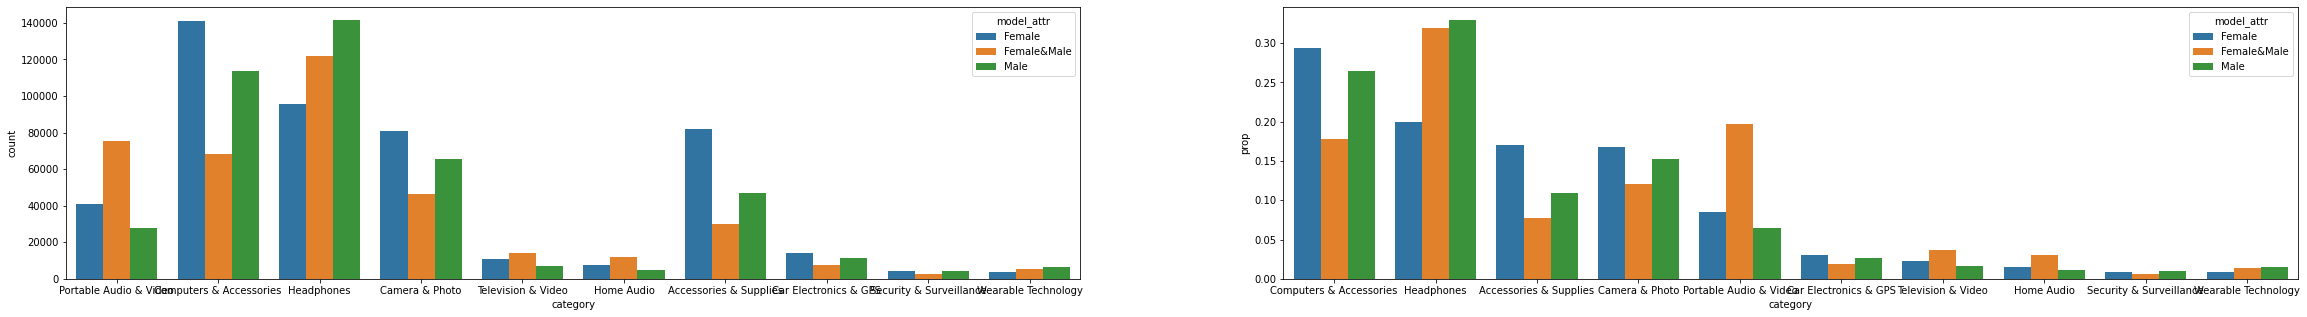

In [104]:
x, y, hue = "category", "prop", "model_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=elc, ax=axes[0])
f.set_size_inches(40, 5)
prop_df = (elc[x]
           .groupby(elc[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
# There is an apparent difference in camera & photo with headphones that more camera & photo recommendation to female and mroe headphones recommedation to male.

In [105]:
#EDA for modcloth

# We have 99893 rows and 12 columns
mod.shape 

(99893, 12)

In [106]:
mod.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [107]:
mod.info()
# There is missing value for user_attr column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     99893 non-null  int64  
 1   user_id     99892 non-null  object 
 2   rating      99893 non-null  int64  
 3   timestamp   99893 non-null  object 
 4   size        78133 non-null  float64
 5   fit         81387 non-null  object 
 6   user_attr   91526 non-null  object 
 7   model_attr  99893 non-null  object 
 8   category    99893 non-null  object 
 9   brand       25913 non-null  object 
 10  year        99893 non-null  int64  
 11  split       99893 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.1+ MB


In [108]:
#Drop duplicates if any
mod.drop_duplicates(inplace=True) 

In [109]:
mod.shape

(99893, 12)

In [110]:
mod.groupby('user_attr').size()
# we have two different user attribution

user_attr
Large    18365
Small    73161
dtype: int64

In [111]:
mod.groupby('fit').size()
# we have two different model attribution

fit
Just right        55287
Slightly large    11114
Slightly small    10771
Very large         2177
Very small         2038
dtype: int64

In [112]:
mod_ads=mod.groupby(['user_attr','category']).size()
type(mod_ads)
cross=mod_ads.to_frame()
cross
# category situation for different model attribution

0
user_attr category        
Large     Bottoms     4297
          Dresses     6083
          Outerwear   1236
          Tops        6749
Small     Bottoms    17624
          Dresses    25006
          Outerwear   5277
          Tops       25254

In [113]:
mod_ads=mod.groupby(['fit','category']).size()
type(mod_ads)
cross=mod_ads.to_frame()
cross
# category situation for different model attribution

0
fit            category        
Just right     Bottoms    13567
               Dresses    19271
               Outerwear   3864
               Tops       18585
Slightly large Bottoms     2308
               Dresses     3287
               Outerwear    875
               Tops        4644
Slightly small Bottoms     2918
               Dresses     3497
               Outerwear    906
               Tops        3450
Very large     Bottoms      353
               Dresses      506
               Outerwear    186
               Tops        1132
Very small     Bottoms      754
               Dresses      654
               Outerwear    102
               Tops         528

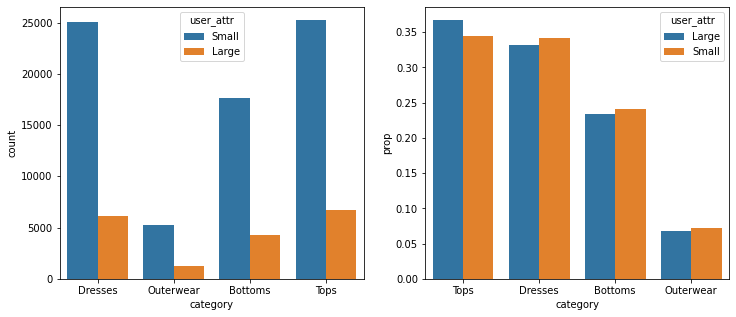

In [114]:
x, y, hue = "category", "prop", "user_attr"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=mod, ax=axes[0])
f.set_size_inches(12, 5)
prop_df = (mod[x]
           .groupby(mod[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
# There is a similar cloth recommendation situation for small or large user attribution

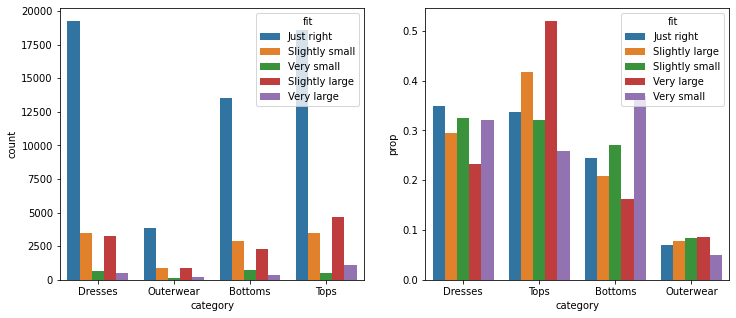

In [115]:
x, y, hue = "category", "prop", "fit"

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=mod, ax=axes[0])
f.set_size_inches(12, 5)
prop_df = (mod[x]
           .groupby(mod[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
# There is a big difference for cloth recommendation for fit situation in tops and bottoms. More tops recommendation to "very large", and more bottoms recommendation to "very small"